### EX.1

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('data_robust_regression.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

In [ ]:
A = np.column_stack((np.ones(100),x,x**2,x**3))
w = la.lstsq(A, y, rcond=None)[0]
print(f"the solution is{w}")

the solution is[-7.53202136 -6.90380055  3.12031949  1.47265097]


In [ ]:
w0, w1, w2, w3 = w

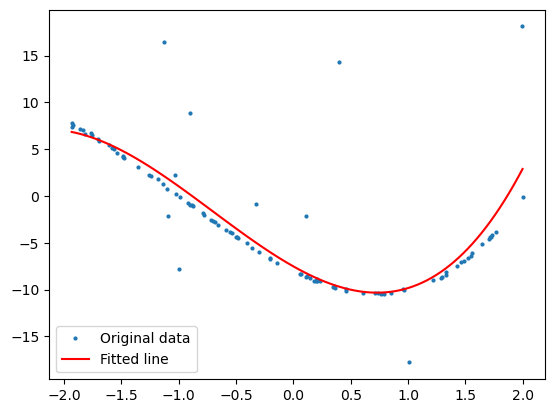

In [ ]:
r = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(r, w0 + w1*r + w2*(r**2) + w3*(r**3), 'r', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
def f(x):
    t = np.zeros(shape=100)
    for i in range(100):
        t[i] = np.sqrt((A[i,:]@x - y[i])**2 + 0.1**2)
    return sum(t)

In [ ]:
def g_prime(x):
    q = np.zeros(shape=100)
    for i in range(100):
        z_i = A[i,:]@x - y[i]
        q[i] = (z_i)/(np.sqrt((z_i)**2 + 0.1**2))
    return q

In [ ]:
def f_prime(x):
      return A.T@g_prime(x)

In [ ]:
def gradient_method_constant(f, g, x0, t, epsilon, max_iter):
    x = x0
    grad = g(x)
    n = 0
    while la.norm(grad) > epsilon:
        n = n + 1
        x = x - t * grad
        fun_val = f(x)
        grad = g(x)
        if n == max_iter:
            break
    return x, fun_val

In [ ]:
e = 10**-5
x0 = np.zeros(shape=4)
t=0.1/(la.norm(A)**2)

In [ ]:
w = gradient_method_constant(f, f_prime, x0, t, e, 400)[0]
print(f"the solution is{w}")

the solution is[-1.23386532 -0.57219953  0.18326743 -1.07557237]


In [ ]:
w0, w1, w2, w3 = w

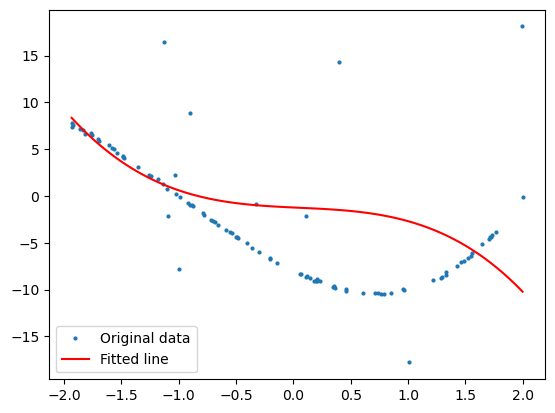

In [ ]:
r = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(r, w0 + w1*r + w2*(r**2) + w3*(r**3), 'r', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
w = gradient_method_constant(f, f_prime, x0, t, e, 1000)[0]
print(f"the solution is{w}")

the solution is[-2.75652269 -1.02479719  0.62988776 -0.964286  ]


In [ ]:
w0, w1, w2, w3 = w

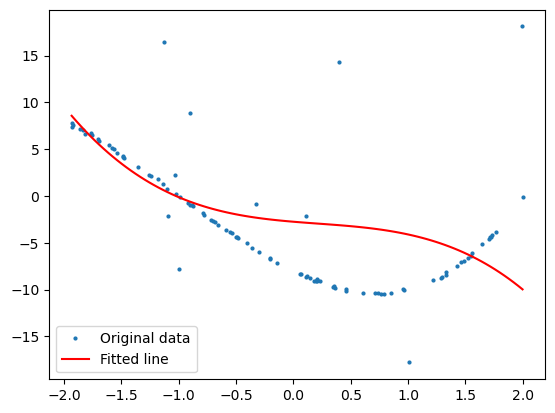

In [ ]:
r = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(r, w0 + w1*r + w2*(r**2) + w3*(r**3), 'r', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
w = gradient_method_constant(f, f_prime, x0, t, e, 4000)[0]
print(f"the solution is{w}")

the solution is[-7.53678173 -5.15761768  2.81947647  0.68567518]


In [ ]:
w0, w1, w2, w3 = w

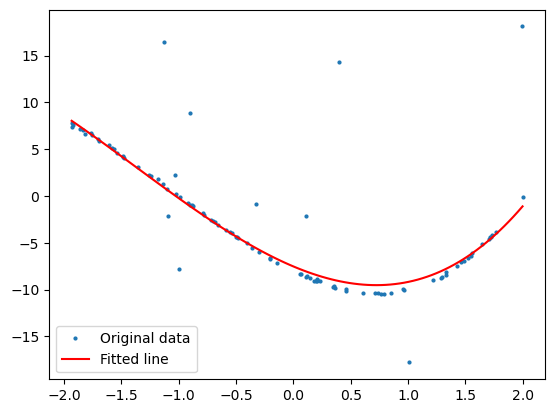

In [ ]:
r = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', label='Original data', markersize=2)
plt.plot(r, w0 + w1*r + w2*(r**2) + w3*(r**3), 'r', label='Fitted line')
plt.legend()
plt.show()

### EX.2

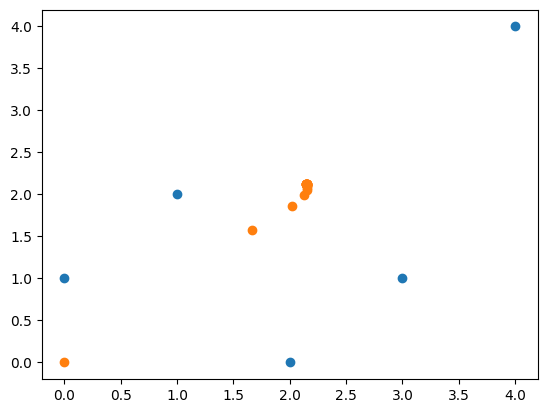

the minimum found by the algorithm is [2.14867259 2.12269264]


In [5]:
a = np.array([[2,0],[3,1],[4,4],[1,3],[0,1]])
plt_x_g = np.array([2,3,4,1,0])
plt_y_g = np.array([0,1,4,2,1])
plt_x = [0] #starting point
plt_y = [0] #starting point
w = np.array([0.2,0.15,0.30,0.25,0.1])
x_0 = np.array([0,0])
x_1 = np.array([0,0])
for k in range(20):
  x_0 = x_1
  sum_0 = np.array([0,0])
  sum_1 = np.array([0,0])
  for i in range(len(w)):
    sum_0 = sum_0 + (w[i]*a[i])/np.linalg.norm(x_0 - a[i])
    sum_1 = sum_1 + (w[i])/np.linalg.norm(x_0 - a[i])
  x_1 = sum_0 / sum_1
  plt_x.append(x_1[0])
  plt_y.append(x_1[1])
plt.plot(plt_x_g, plt_y_g, 'o')
plt.plot(plt_x, plt_y, 'o')
plt.show()
print(f"the minimum found by the algorithm is {x_1}")